# Pull HLS data

This notebook pulls all sentinel data from HLS starting in 2017. 

First, it walks through the steps for one image and river reach, with some plots showing the process. Then, pulls all the data and saves median values for NDTI, NDCI, red, green, and VNIR in a csv. 

It takes about 16 hours to pull all the data. 

In [5]:
#pip install -q earthaccess

In [40]:
import geopandas as gpd
import earthaccess
import pandas as pd
from osgeo import gdal
import rasterio as rio
import xarray 
import rioxarray 
import matplotlib.pyplot as plt
import os
import numpy as np
from skimage import io

In [41]:
# EarthAccess setup for HLS
# https://github.com/nasa/HLS-Data-Resources/blob/main/python/tutorials/HLS_Tutorial.ipynb

earthaccess.login(persist=True)

# Load River reach mask
I want to find HLS tiles which overlap with these locations. 

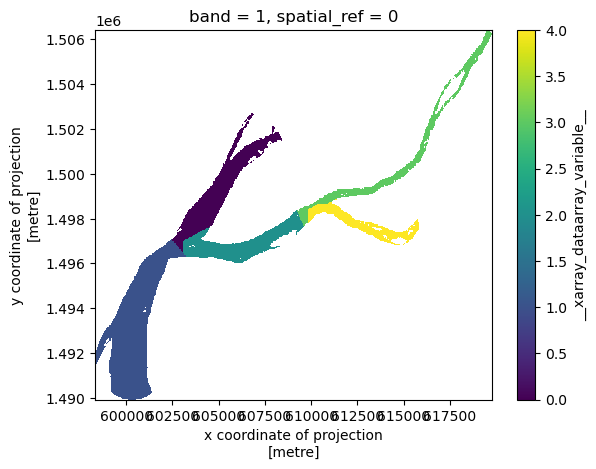

In [42]:
reach_mask = rioxarray.open_rasterio('data/external/river_reach_mask.nc', masked=True).squeeze()
reach_mask = reach_mask.rio.write_crs('EPSG:32648')
reach_mask.plot.imshow()

# Query earthaccess for some HLS data in Nov 20-30

In [43]:

# GDAL configurations used to successfully access LP DAAC Cloud Assets via vsicurl 
gdal.SetConfigOption('GDAL_HTTP_COOKIEFILE','~/cookies.txt')
gdal.SetConfigOption('GDAL_HTTP_COOKIEJAR', '~/cookies.txt')
gdal.SetConfigOption('GDAL_DISABLE_READDIR_ON_OPEN','EMPTY_DIR')
gdal.SetConfigOption('CPL_VSIL_CURL_ALLOWED_EXTENSIONS','TIF')
gdal.SetConfigOption('GDAL_HTTP_UNSAFESSL', 'YES')

In [44]:
# look for data over the sampling dates 
# (Nov 20, 21, 29, & 30, 2023)
temporal = ("2023-11-20T00:00:00", "2023-11-30T23:59:59")

In [45]:
#xds_lonlat = xds.rio.reproject("EPSG:4326")
bounds_proj = reach_mask.rio.bounds()
bounds_latlon = reach_mask.rio.reproject('EPSG:4326').rio.bounds()

In [62]:
results = earthaccess.search_data(
    short_name=['HLSS30'], # only query sentinel for now
    bounding_box=bounds_latlon,
    temporal=temporal,
    count=100
)
results_df = pd.json_normalize(results)
results_df

Granules found: 7


,size,meta.concept-type,meta.concept-id,meta.revision-id,meta.native-id,meta.provider-id,meta.format,meta.revision-date,umm.TemporalExtent.RangeDateTime.BeginningDateTime,umm.TemporalExtent.RangeDateTime.EndingDateTime,...,umm.CollectionReference.EntryTitle,umm.RelatedUrls,umm.DataGranule.DayNightFlag,umm.DataGranule.Identifiers,umm.DataGranule.ProductionDateTime,umm.DataGranule.ArchiveAndDistributionInformation,umm.Platforms,umm.MetadataSpecification.URL,umm.MetadataSpecification.Name,umm.MetadataSpecification.Version
0,210.919179,granule,G2805838792-LPCLOUD,1,HLS.S30.T48PXA.2023325T032029.v2.0,LPCLOUD,application/echo10+xml,2023-11-23T07:16:54.521Z,2023-11-21T03:34:10.537Z,2023-11-21T03:34:10.537Z,...,HLS Sentinel-2 Multi-spectral Instrument Surfa...,[{'URL': 'https://data.lpdaac.earthdatacloud.n...,Day,[{'Identifier': 'HLS.S30.T48PXA.2023325T032029...,2023-11-23T07:14:18.000Z,"[{'Name': 'Not provided', 'SizeInBytes': 22116...","[{'ShortName': 'Sentinel-2B', 'Instruments': [...",https://cdn.earthdata.nasa.gov/umm/granule/v1.6.5,UMM-G,1.6.5
1,213.359418,granule,G2805855317-LPCLOUD,1,HLS.S30.T48PWA.2023325T032029.v2.0,LPCLOUD,application/echo10+xml,2023-11-23T07:41:50.962Z,2023-11-21T03:34:13.645Z,2023-11-21T03:34:13.645Z,...,HLS Sentinel-2 Multi-spectral Instrument Surfa...,[{'URL': 'https://data.lpdaac.earthdatacloud.n...,Day,[{'Identifier': 'HLS.S30.T48PWA.2023325T032029...,2023-11-23T07:39:33.000Z,"[{'Name': 'Not provided', 'SizeInBytes': 22372...","[{'ShortName': 'Sentinel-2B', 'Instruments': [...",https://cdn.earthdata.nasa.gov/umm/granule/v1.6.5,UMM-G,1.6.5
2,204.556009,granule,G2806386483-LPCLOUD,1,HLS.S30.T48PXV.2023325T032029.v2.0,LPCLOUD,application/echo10+xml,2023-11-24T08:36:00.043Z,2023-11-21T03:34:25.151Z,2023-11-21T03:34:25.151Z,...,HLS Sentinel-2 Multi-spectral Instrument Surfa...,[{'URL': 'https://data.lpdaac.earthdatacloud.n...,Day,[{'Identifier': 'HLS.S30.T48PXV.2023325T032029...,2023-11-24T08:33:20.000Z,"[{'Name': 'Not provided', 'SizeInBytes': 21449...","[{'ShortName': 'Sentinel-2B', 'Instruments': [...",https://cdn.earthdata.nasa.gov/umm/granule/v1.6.5,UMM-G,1.6.5
3,213.118293,granule,G2805848873-LPCLOUD,1,HLS.S30.T48PWV.2023325T032029.v2.0,LPCLOUD,application/echo10+xml,2023-11-23T07:30:07.851Z,2023-11-21T03:34:28.379Z,2023-11-21T03:34:28.379Z,...,HLS Sentinel-2 Multi-spectral Instrument Surfa...,[{'URL': 'https://data.lpdaac.earthdatacloud.n...,Day,[{'Identifier': 'HLS.S30.T48PWV.2023325T032029...,2023-11-23T07:27:45.000Z,"[{'Name': 'Not provided', 'SizeInBytes': 22347...","[{'ShortName': 'Sentinel-2B', 'Instruments': [...",https://cdn.earthdata.nasa.gov/umm/granule/v1.6.5,UMM-G,1.6.5
4,219.651117,granule,G2807854527-LPCLOUD,1,HLS.S30.T48PXA.2023330T032051.v2.0,LPCLOUD,application/echo10+xml,2023-11-28T07:38:56.710Z,2023-11-26T03:34:08.246Z,2023-11-26T03:34:08.246Z,...,HLS Sentinel-2 Multi-spectral Instrument Surfa...,[{'URL': 'https://data.lpdaac.earthdatacloud.n...,Day,[{'Identifier': 'HLS.S30.T48PXA.2023330T032051...,2023-11-28T07:36:43.000Z,"[{'Name': 'Not provided', 'SizeInBytes': 23032...","[{'ShortName': 'Sentinel-2A', 'Instruments': [...",https://cdn.earthdata.nasa.gov/umm/granule/v1.6.5,UMM-G,1.6.5
5,209.804811,granule,G2807853869-LPCLOUD,1,HLS.S30.T48PWA.2023330T032051.v2.0,LPCLOUD,application/echo10+xml,2023-11-28T07:36:20.440Z,2023-11-26T03:34:11.358Z,2023-11-26T03:34:11.358Z,...,HLS Sentinel-2 Multi-spectral Instrument Surfa...,[{'URL': 'https://data.lpdaac.earthdatacloud.n...,Day,[{'Identifier': 'HLS.S30.T48PWA.2023330T032051...,2023-11-28T07:33:51.000Z,"[{'Name': 'Not provided', 'SizeInBytes': 21999...","[{'ShortName': 'Sentinel-2A', 'Instruments': [...",https://cdn.earthdata.nasa.gov/umm/granule/v1.6.5,UMM-G,1.6.5
6,226.741940,granule,G2807856452-LPCLOUD,1,HLS.S30.T48PWV.2023330T032051.v2.0,LPCLOUD,application/echo10+xml,2023-11-28T07:44:27.239Z,2023-11-26T03:34:26.093Z,2023-11-26T03:34:26.093Z,...,HLS Sentinel-2 Multi-spectral Instrument Surfa...,[{'URL': 'https://data.lpdaac.earthdata

There are four different sentinel images which 
overlap with these samples (annoyingly). 

Pull one of each and save a matching mask. This will make it
easy down the line to mask depending on which image we're looking at. 

In [63]:
img_names = ['PWV', 'PWA', 'PXV', 'PXA']

In [64]:
img_urls = []
for img_name in img_names: 
    idx = results_df.loc[results_df['meta.native-id'].str.contains(img_name)].index[0]
    urls = results[idx].data_links()
    for url in urls: 
        if 'B04' in url: 
            img_urls.append(url)
img_urls

['https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T48PWV.2023325T032029.v2.0/HLS.S30.T48PWV.2023325T032029.v2.0.B04.tif',
 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T48PWA.2023325T032029.v2.0/HLS.S30.T48PWA.2023325T032029.v2.0.B04.tif',
 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T48PXV.2023325T032029.v2.0/HLS.S30.T48PXV.2023325T032029.v2.0.B04.tif',
 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T48PXA.2023325T032029.v2.0/HLS.S30.T48PXA.2023325T032029.v2.0.B04.tif']

For each image, save a version of the river mask matching the extent

In [66]:
# Use vsicurl to load the data directly into memory (be patient, may take a few seconds)
chunk_size = dict(band=1, x=512, y=512) # Tiles have 1 band and are divided into 512x512 pixel chunks
for i, name in enumerate(img_names):
    mask_fn = 'data/external/reach_mask_' + name + '.tif'
    if not os.path.exists(mask_fn):
        print(name)
        url = img_urls[i]
        print(url)
        # pull it 
        img = rioxarray.open_rasterio(url, chunks=chunk_size, masked=True).squeeze('band', drop=True)
        # clip to extent of river mask
        img = img.rio.clip_box(*reach_mask.rio.bounds())
        # update reach mask to match 
        mask = reach_mask.rio.reproject_match(img)
        # save it
        mask.rio.to_raster(mask_fn)
    else: 
        print(f'{name} mask already created')
    

PWV mask already created
PWA mask already created
PXV mask already created
PXA mask already created


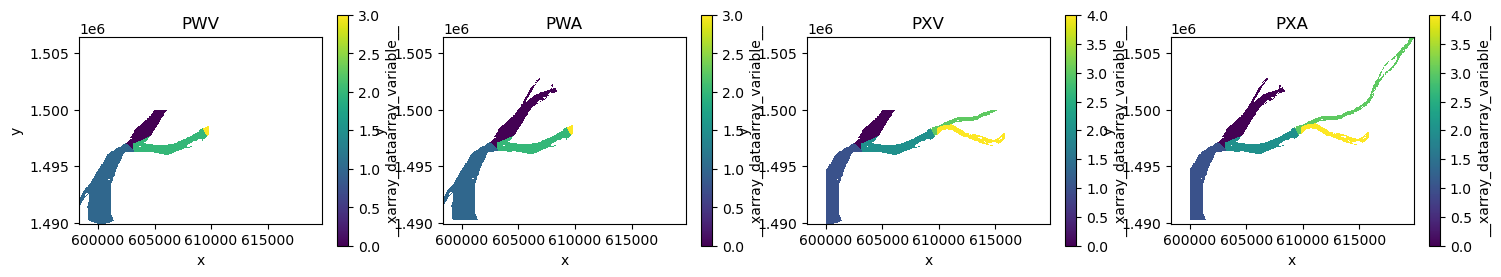

In [67]:
mask_pwv = rioxarray.open_rasterio('data/external/reach_mask_PWV.tif').squeeze()
mask_pwa = rioxarray.open_rasterio('data/external/reach_mask_PWA.tif').squeeze()
mask_pxv = rioxarray.open_rasterio('data/external/reach_mask_PXV.tif').squeeze()
mask_pxa = rioxarray.open_rasterio('data/external/reach_mask_PXA.tif').squeeze()

# plot Them
fig, ax = plt.subplots(1, 4, figsize=(18, 3))

mask_pwv.plot.imshow(ax=ax[0])
ax[0].set_title("PWV")

mask_pwa.plot.imshow(ax=ax[1])
ax[1].set_title("PWA")

mask_pxv.plot.imshow(ax=ax[2])
ax[2].set_title("PXV")

mask_pxa.plot.imshow(ax=ax[3])
ax[3].set_title("PXA")
        
for a in ax: 
    a.set_aspect('equal')
    a.set_xlim(bounds_proj[0], bounds_proj[2])
    a.set_ylim(bounds_proj[1], bounds_proj[3])

Pull QC band (Fmask), red (B04), green (B03), and NIR (B05)

mask_pwv = rioxarray.open_rasterio('data/external/reach_mask_PWV.tif').squeeze()
mask_pwa = rioxarray.open_rasterio('data/external/reach_mask_PWA.tif').squeeze()
mask_pxv = rioxarray.open_rasterio('data/external/reach_mask_PXV.tif').squeeze()
mask_pxa = rioxarray.open_rasterio('data/external/reach_mask_PXA.tif').squeeze()
# Pull the data

In [68]:
hls_results_urls = [granule.data_links() for granule in results]

In [69]:
h = hls_results_urls[0]  

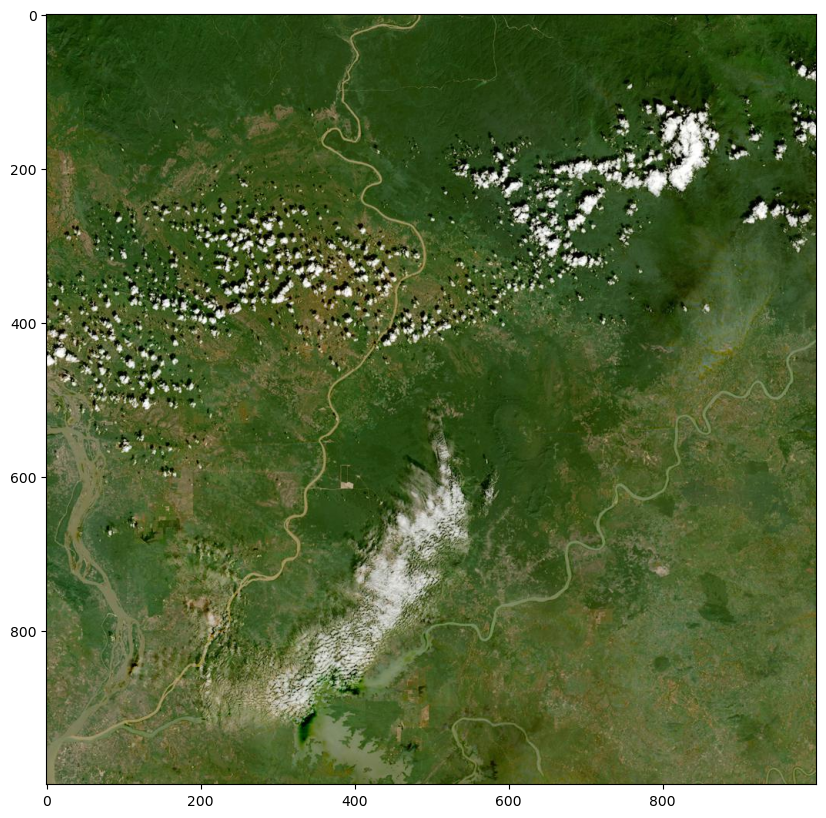

In [70]:
browse_urls = [granule.dataviz_links()[0] for granule in results] # 0 retrieves only the https links

image = io.imread(browse_urls[0])  # Load jpg browse image into memory

# Basic plot of the image
plt.figure(figsize=(10,10))              
plt.imshow(image)
plt.show()

In [71]:
# Pull fmask, red, green, NIR
# Fmask, B04, B03, B05
band_links = []

# Define which HLS product is being accessed
bands = ['Fmask', 'B04', 'B03', 'B05'] 


In [72]:
# Subset the assets in the item down to only the desired bands
for url in h: 
    if any(b in url for b in bands):
        band_links.append(url)
band_links

['https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T48PXA.2023325T032029.v2.0/HLS.S30.T48PXA.2023325T032029.v2.0.B04.tif',
 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T48PXA.2023325T032029.v2.0/HLS.S30.T48PXA.2023325T032029.v2.0.Fmask.tif',
 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T48PXA.2023325T032029.v2.0/HLS.S30.T48PXA.2023325T032029.v2.0.B05.tif',
 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T48PXA.2023325T032029.v2.0/HLS.S30.T48PXA.2023325T032029.v2.0.B03.tif']

In [73]:

# Use vsicurl to load the data directly into memory (be patient, may take a few seconds)
chunk_size = dict(band=1, x=512, y=512) # Tiles have 1 band and are divided into 512x512 pixel chunks
# Sometimes a vsi curl error occurs so we need to retry if it does
max_retries = 1
for url in band_links:
    print(url)
    # Try Loop
    for _i in range(max_retries):
        try:
            # Open and build datasets
            if url.rsplit('.', 2)[-2] == bands[0]:      # Fmask index
                fmask = rioxarray.open_rasterio(url, chunks=chunk_size, masked=True).squeeze('band', drop=True)
            elif url.rsplit('.', 2)[-2] == bands[1]:    # Red index
                red = rioxarray.open_rasterio(url, chunks=chunk_size, masked=True).squeeze('band', drop=True)
                red.attrs['scale_factor'] = 0.0001        # hard coded the scale_factor attribute
            elif url.rsplit('.', 2)[-2] == bands[2]:    # Green index
                green = rioxarray.open_rasterio(url, chunks=chunk_size, masked=True).squeeze('band', drop=True)
                green.attrs['scale_factor'] = 0.0001       # hard coded the scale_factor attribute
            elif url.rsplit('.', 2)[-2] == bands[3]:    # NIR index
                nir = rioxarray.open_rasterio(url, chunks=chunk_size, masked=True).squeeze('band', drop=True)
                nir.attrs['scale_factor'] = 0.0001       # hard coded the scale_factor attribute
            break # Break out of the retry loop
        except Exception as ex:
            print(f"vsi curl error: {ex}. Retrying...")
    else:
        print(f"Failed to process {url} after {max_retries} retries. Please check to see you're authenticated with earthaccess.")
print("The COGs have been loaded into memory!")

https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T48PXA.2023325T032029.v2.0/HLS.S30.T48PXA.2023325T032029.v2.0.B04.tif
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T48PXA.2023325T032029.v2.0/HLS.S30.T48PXA.2023325T032029.v2.0.Fmask.tif
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T48PXA.2023325T032029.v2.0/HLS.S30.T48PXA.2023325T032029.v2.0.B05.tif
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T48PXA.2023325T032029.v2.0/HLS.S30.T48PXA.2023325T032029.v2.0.B03.tif
The COGs have been loaded into memory!


# Turn it into xarray dataset
One band per dataarray? 


In [74]:
hls_ds = fmask.to_dataset(name='fmask')
hls_ds['red'] = red
hls_ds['green'] = green
hls_ds['nir'] = nir

## Filter to only one reach

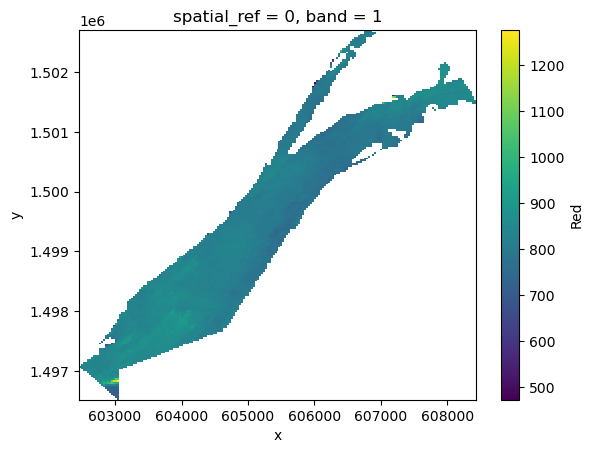

In [75]:
reach_0 = hls_ds.where(mask_pxa == 0, drop=True)
reach_0['red'].plot.imshow()

# Remove clouds, and any pixels which do not pass QC
Also record percentage of pixels which did pass QC


* Bit 0: Cirrus
    * 0: Reserved but not used
    * 1: Reserved but not used
* Bit 1: Cloud
    * 0: No
    * 1: Yes
* Bit 2: Adjacent to cloud/shadow
    * 0: No
    * 1: Yes
* Bit 3: Cloud shadow
    * 0: No
    * 1: Yes
* Bit 4: Snow/ice
    * 0: No
    * 1: Yes
* Bit 5: Water
    * 0: No
    * 1: Yes
* Bits 6-7: Aerosol level
    * 0: Climatology aerosol
    * 1: Low aerosol
    * 2: Moderate aerosol
    * 3: High aerosol


In [76]:
# NDTI
def ndti(dataset): 
    ndti = (dataset['red'] - dataset['green']) / (dataset['red'] + dataset['green'])
    return(ndti)

# ndci
def ndci(dataset):
    ndci = (dataset['nir'] - dataset['red']) / (dataset['nir'] + dataset['red'])
    return(ndci)

# Get value of QC bit based on location
def get_qc_bit(ar, bit):
    return ( (ar // (2**bit)) - ( (ar // (2**bit)) // 2 * 2) )

0


-0.024641834

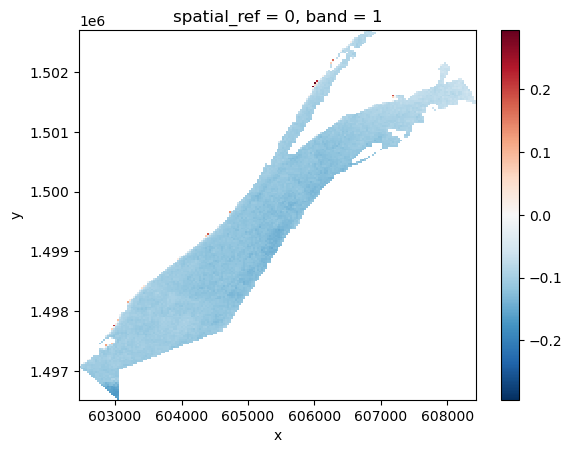

In [79]:
# Not cloud
cloud_mask = (
    (get_qc_bit(reach_0['fmask'], 1) == 0) & # not cloud
    (get_qc_bit(reach_0['fmask'], 2) == 0) & # not cloud adjacent
    (get_qc_bit(reach_0['fmask'], 3) == 0)   # not cloud shadow
)

reach_0_qa = reach_0.where(cloud_mask)
reach_0_failed_count = reach_0['red'].count().values - reach_0_qa['red'].count().values
reach_0_qa.attrs['failed_pixel_count'] = reach_0_failed_count
reach_0_qa.attrs['total_pixel_count'] = reach_0['red'].count().values
print(reach_0_failed_count)

ndci(reach_0.where(cloud_mask)).plot.imshow()
np.nanmedian(ndti(reach_0.where(cloud_mask)).values)

# Repeat for all reaches and days

In [80]:
# Run for an entire year. 
# 502 granules. That's quite a few. 
# This may take many hours to run. 
# I might have to update some things to run more than one year. 
# Let's start with this. 
temporal = ("2017-07-01T00:00:00", "2024-10-01T23:59:59")
results = earthaccess.search_data(
    short_name=['HLSS30'], 
    bounding_box=bounds_latlon,
    temporal=temporal
)
results_df = pd.json_normalize(results)
results_df

Granules found: 1661


,size,meta.concept-type,meta.concept-id,meta.revision-id,meta.native-id,meta.provider-id,meta.format,meta.revision-date,umm.TemporalExtent.RangeDateTime.BeginningDateTime,umm.TemporalExtent.RangeDateTime.EndingDateTime,...,umm.CollectionReference.EntryTitle,umm.RelatedUrls,umm.DataGranule.DayNightFlag,umm.DataGranule.Identifiers,umm.DataGranule.ProductionDateTime,umm.DataGranule.ArchiveAndDistributionInformation,umm.Platforms,umm.MetadataSpecification.URL,umm.MetadataSpecification.Name,umm.MetadataSpecification.Version
0,237.701668,granule,G2703035509-LPCLOUD,1,HLS.S30.T48PXA.2017191T031541.v2.0,LPCLOUD,application/echo10+xml,2023-06-03T21:41:51.359Z,2017-07-10T03:32:11.590Z,2017-07-10T03:32:11.590Z,...,HLS Sentinel-2 Multi-spectral Instrument Surfa...,[{'URL': 'https://data.lpdaac.earthdatacloud.n...,Day,[{'Identifier': 'HLS.S30.T48PXA.2017191T031541...,2023-06-03T21:39:40.000Z,"[{'Name': 'Not provided', 'SizeInBytes': 24924...","[{'ShortName': 'Sentinel-2A', 'Instruments': [...",https://cdn.earthdata.nasa.gov/umm/granule/v1.6.5,UMM-G,1.6.5
1,239.597567,granule,G2703035888-LPCLOUD,1,HLS.S30.T48PXV.2017191T031541.v2.0,LPCLOUD,application/echo10+xml,2023-06-03T21:42:50.146Z,2017-07-10T03:32:11.590Z,2017-07-10T03:32:11.590Z,...,HLS Sentinel-2 Multi-spectral Instrument Surfa...,[{'URL': 'https://data.lpdaac.earthdatacloud.n...,Day,[{'Identifier': 'HLS.S30.T48PXV.2017191T031541...,2023-06-03T21:40:30.000Z,"[{'Name': 'Not provided', 'SizeInBytes': 25123...","[{'ShortName': 'Sentinel-2A', 'Instruments': [...",https://cdn.earthdata.nasa.gov/umm/granule/v1.6.5,UMM-G,1.6.5
2,238.758801,granule,G2703043094-LPCLOUD,1,HLS.S30.T48PWA.2017191T031541.v2.0,LPCLOUD,application/echo10+xml,2023-06-03T21:59:44.474Z,2017-07-10T03:32:11.590Z,2017-07-10T03:32:11.590Z,...,HLS Sentinel-2 Multi-spectral Instrument Surfa...,[{'URL': 'https://data.lpdaac.earthdatacloud.n...,Day,[{'Identifier': 'HLS.S30.T48PWA.2017191T031541...,2023-06-03T21:56:23.000Z,"[{'Name': 'Not provided', 'SizeInBytes': 25035...","[{'ShortName': 'Sentinel-2A', 'Instruments': [...",https://cdn.earthdata.nasa.gov/umm/granule/v1.6.5,UMM-G,1.6.5
3,173.217145,granule,G2701513811-LPCLOUD,1,HLS.S30.T48PXV.2017206T031539.v2.0,LPCLOUD,application/echo10+xml,2023-06-01T11:16:44.309Z,2017-07-25T03:32:11.600Z,2017-07-25T03:32:11.600Z,...,HLS Sentinel-2 Multi-spectral Instrument Surfa...,[{'URL': 'https://data.lpdaac.earthdatacloud.n...,Day,[{'Identifier': 'HLS.S30.T48PXV.2017206T031539...,2023-06-01T11:13:24.000Z,"[{'Name': 'Not provided', 'SizeInBytes': 18163...","[{'ShortName': 'Sentinel-2B', 'Instruments': [...",https://cdn.earthdata.nasa.gov/umm/granule/v1.6.5,UMM-G,1.6.5
4,167.408355,granule,G2701520394-LPCLOUD,1,HLS.S30.T48PXA.2017206T031539.v2.0,LPCLOUD,application/echo10+xml,2023-06-01T11:40:47.975Z,2017-07-25T03:32:11.600Z,2017-07-25T03:32:11.600Z,...,HLS Sentinel-2 Multi-spectral Instrument Surfa...,[{'URL': 'https://data.lpdaac.earthdatacloud.n...,Day,[{'Identifier': 'HLS.S30.T48PXA.2017206T031539...,2023-06-01T11:38:04.000Z,"[{'Name': 'Not provided', 'SizeInBytes': 17554...","[{'ShortName': 'Sentinel-2B', 'Instruments': [...",https://cdn.earthdata.nasa.gov/umm/granule/v1.6.5,UMM-G,1.6.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1656,243.706648,granule,G2877555328-LPCLOUD,1,HLS.S30.T48PWV.2024055T031721.v2.0,LPCLOUD,application/echo10+xml,2024-02-26T07:37:54.605Z,2024-02-24T03:34:30.259Z,2024-02-24T03:34:30.259Z,...,HLS Sentinel-2 Multi-spectral Instrument Surfa...,[{'URL': 'https://data.lpdaac.earthdatacloud.n...,Day,[{'Identifier': 'HLS.S30.T48PWV.2024055T031721...,2024-02-26T07:34:31.000Z,"[{'Name': 'Not provided', 'SizeInBytes': 25554...","[{'ShortName': 'Sentinel-2A', 'Instruments': [...",https://cdn.earthdata.nasa.gov/umm/granule/v1.6.5,UMM-G,1.6.5
1657,209.248695,granule,G2885993483-LPCLOUD,1,HLS.S30.T48PXA.2024060T031649.v2.0,LPCLOUD,application/echo10+xml,2024-03-05T13:47:00.624Z,2024-02-29T03:34:12.230Z,2024-02-29T03:34:12.230Z

In [81]:
# set up dataframe to store data
# Add column for each river reach
results_df[0] = np.nan
results_df[1] = np.nan
results_df[2] = np.nan
results_df[3] = np.nan
results_df[4] = np.nan

# clean some stuff up
results_df['platform'] = [p[0]['ShortName'] for p in results_df['umm.Platforms']]
results_df['tile'] = [id[11:14] for id in results_df['meta.native-id']]
results_df['start_time'] = results_df['umm.TemporalExtent.RangeDateTime.BeginningDateTime']
results_df['end_time'] = results_df['umm.TemporalExtent.RangeDateTime.EndingDateTime']

## reshape to get one row for each reach
id_vars = [
    'meta.native-id',
    'platform',
    'tile',
    'start_time', 
    'end_time',
]

value_vars = [
    0, # these are reach ids. data will go here. 
    1,
    2,
    3,
    4,
]

results_df_long = results_df.melt(id_vars = id_vars, 
                             value_vars = value_vars,
                             var_name = 'reach', 
                             value_name = 'red')

# add columns for other variables
results_df_long['green'] = np.nan
results_df_long['nir'] = np.nan
results_df_long['ndti'] = np.nan
results_df_long['ndci'] = np.nan
results_df_long['qc_fail_pixels'] = np.nan
results_df_long['total_pixels'] = np.nan

results_df_long

,meta.native-id,platform,tile,start_time,end_time,reach,red,green,nir,ndti,ndci,qc_fail_pixels,total_pixels
0,HLS.S30.T48PXA.2017191T031541.v2.0,Sentinel-2A,PXA,2017-07-10T03:32:11.590Z,2017-07-10T03:32:11.590Z,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,HLS.S30.T48PXV.2017191T031541.v2.0,Sentinel-2A,PXV,2017-07-10T03:32:11.590Z,2017-07-10T03:32:11.590Z,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,HLS.S30.T48PWA.2017191T031541.v2.0,Sentinel-2A,PWA,2017-07-10T03:32:11.590Z,2017-07-10T03:32:11.590Z,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,HLS.S30.T48PXV.2017206T031539.v2.0,Sentinel-2B,PXV,2017-07-25T03:32:11.600Z,2017-07-25T03:32:11.600Z,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,HLS.S30.T48PXA.2017206T031539.v2.0,Sentinel-2B,PXA,2017-07-25T03:32:11.600Z,2017-07-25T03:32:11.600Z,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8300,HLS.S30.T48PWV.2024055T031721.v2.0,Sentinel-2A,PWV,2024-02-24T03:34:30.259Z,2024-02-24T03:34:30.259Z,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8301,HLS.S30.T48PXA.2024060T031649.v2.0,Sentinel-2B,PXA,2024-02-29T03:34:12.230Z,2024-02-29T03:34:12.230Z,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8302,HLS.S30.T48PWA.2024060T031649.v2.0,Sentinel-2B,PWA,2024-02-29T03:34:15.340Z,2024-02-29T03:34:15.340Z,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8303,HLS.S30.T48PXV.2024060T031649.v2.0,Sentinel-2B,PXV,2024-02-29T03:34:26.839Z,2024-02-29T03:34:26.839Z,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
# already defined this above but just so I remember...
bands = ['Fmask', 'B04', 'B03', 'B05', 'B06']

# For each image: 
for i, result in enumerate(results): 
    print(f'------Starting {result["meta"]["native-id"]} ({i}/{len(results)})------')
    print(result.dataviz_links()[0])
    h = result.data_links()
    band_links = []
    # Get urls for appropriate bands
    for url in h: 
        if any(b in url for b in bands):
            band_links.append(url)

    # Load bands into memory
    for url in band_links:
        # Try Loop
        for _i in range(max_retries):
            try:
                # Open and build datasets
                if url.rsplit('.', 2)[-2] == bands[0]:      # Fmask index
                    fmask = rioxarray.open_rasterio(url, chunks=chunk_size, masked=True).squeeze('band', drop=True)
                elif url.rsplit('.', 2)[-2] == bands[1]:    # Red index
                    red = rioxarray.open_rasterio(url, chunks=chunk_size, masked=True).squeeze('band', drop=True)
                    red.attrs['scale_factor'] = 0.0001        # hard coded the scale_factor attribute
                elif url.rsplit('.', 2)[-2] == bands[2]:    # Green index
                    green = rioxarray.open_rasterio(url, chunks=chunk_size, masked=True).squeeze('band', drop=True)
                    green.attrs['scale_factor'] = 0.0001       # hard coded the scale_factor attribute
                elif url.rsplit('.', 2)[-2] == bands[3]:    # NIR index
                    nir = rioxarray.open_rasterio(url, chunks=chunk_size, masked=True).squeeze('band', drop=True)
                    nir.attrs['scale_factor'] = 0.0001       # hard coded the scale_factor attribute
                break # Break out of the retry loop
            except Exception as ex:
                print(f"vsi curl error: {ex}. Retrying...")
        else:
            print(f"Failed to process {url} after {max_retries} retries. Please check to see you're authenticated with earthaccess.")
    print("The COGs have been loaded into memory!")

    print('creating dataset...')
    # combine into xarray dataset
    hls_ds = fmask.to_dataset(name='fmask')
    hls_ds['red'] = red
    hls_ds['green'] = green
    hls_ds['nir'] = nir
    print('done creating dataset.')

    # 
    # For each reach: 
    for reach in np.arange(5): 
        print(f'----starting on reach {reach}...----')
    # Filter to only pixels from that reach
        if results_df.loc[i, 'tile'] == 'PXA': 
            hls_reach = hls_ds.where(mask_pxa == reach, drop=True)
        elif results_df.loc[i, 'tile'] == 'PWA': 
            hls_reach = hls_ds.where(mask_pwa == reach, drop=True)
        elif results_df.loc[i, 'tile'] == 'PXV': 
            hls_reach = hls_ds.where(mask_pxv == reach, drop=True)
        elif results_df.loc[i, 'tile'] == 'PWV':
            hls_reach = hls_ds.where(mask_pwv == reach, drop=True)


        # remove clouds and cloud shadow
        print('masking clouds')
        cloud_mask = (
            (get_qc_bit(hls_reach['fmask'], 1) == 0) & # not cloud
            (get_qc_bit(hls_reach['fmask'], 2) == 0) & # not cloud adjacent
            (get_qc_bit(hls_reach['fmask'], 3) == 0)   # not cloud shadow
        )

        # remove cloudy pixels
        reach_qa = hls_reach.where(cloud_mask)
        row_idx = ((results_df_long['meta.native-id'] == result['meta']['native-id']) &
                                (results_df_long['reach'] == reach))
        # Get number of pixels which failed qc
        results_df_long.loc[row_idx, 'total_pixels'] = hls_reach['red'].count().values
        results_df_long.loc[row_idx, 'qc_fail_pixels'] = hls_reach['red'].count().values - reach_qa['red'].count().values

        if reach_qa['red'].count().values == 0: 
            print('no valid pixels. Skipping this reach.')
        else: 
            print('recording data...')
            # update row
            
            results_df_long.loc[row_idx, 'red'] = np.nanmedian(reach_qa['red'].values)
            results_df_long.loc[row_idx, 'green'] = np.nanmedian(reach_qa['green'].values)
            results_df_long.loc[row_idx, 'nir'] = np.nanmedian(reach_qa['nir'].values)
            results_df_long.loc[row_idx, 'ndti'] = np.nanmedian(ndti(reach_qa).values)
            results_df_long.loc[row_idx, 'ndci'] = np.nanmedian(ndci(reach_qa).values)
        
    print(f'---Done with {result["meta"]["native-id"]}---\n')


# SAVE OUTPUT TO CSV
results_df_long.to_csv('data/results_hls_sentinel.csv')
results_df_long

------Starting HLS.S30.T48PXA.2017191T031541.v2.0 (0/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXA.2017191T031541.v2.0/HLS.S30.T48PXA.2017191T031541.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXA.2017191T031541.v2.0---

------Starting HLS.S30.T48PXV.2017191T031541.v2.0 (1/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXV.2017191T031541.v2.0/HLS.S30.T48PXV.2017191T031541.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...

/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWA.2017211T031541.v2.0---

------Starting HLS.S30.T48PXA.2017211T031541.v2.0 (6/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXA.2017211T031541.v2.0/HLS.S30.T48PXA.2017211T031541.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXA.2017211T031541.v2.0---

------Starting HLS.S30.T48PWV.2017211T031541.v2.0 (7/1661)------
https://

/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWV.2017281T033241.v2.0---

------Starting HLS.S30.T48PWA.2017281T033241.v2.0 (37/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWA.2017281T033241.v2.0/HLS.S30.T48PWA.2017281T033241.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWA.2017281T033241.v2.0---

------Starting HLS.S30.T48PXV.2017281T033241.v2.0 (38/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-pro

/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXV.2017311T031931.v2.0---

------Starting HLS.S30.T48PXA.2017311T031931.v2.0 (61/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXA.2017311T031931.v2.0/HLS.S30.T48PXA.2017311T031931.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXA.2017311T031931.v2.0---

------Starting HLS.S30.T48PX

/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


---Done with HLS.S30.T48PXA.2017326T032029.v2.0---

------Starting HLS.S30.T48PWV.2017326T032029.v2.0 (72/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWV.2017326T032029.v2.0/HLS.S30.T48PWV.2017326T032029.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWV.2017326T032029.v2.0---

------Starting HLS.S30.T48PXV.2017326T032029.v2.0 (73/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXV.2017326T032029.v2.0/HLS.S30.T48PXV.2017326T032029.v2.0.jpg
The COGs have been loaded into memory!
creating datase

/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PXA.2018026T032011.v2.0---

------Starting HLS.S30.T48PXV.2018031T031949.v2.0 (125/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXV.2018031T031949.v2.0/HLS.S30.T48PXV.2018031T031949.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXV.2018031T031949.v2.0---

------Starting HLS.S30.T48PXA.2018031T031949.v2.0 (

/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXV.2018036T033241.v2.0---

------Starting HLS.S30.T48PXA.2018036T033241.v2.0 (130/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXA.2018036T033241.v2.0/HLS.S30.T48PXA.2018036T033241.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXA.2018036T033241.v2.0---

------Starting HLS.S30.T48PWA.2018036T033241.v2.0 (131/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWA.2018036T033241.v2.0/HLS.S30.T48PWA.2018036T033241.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWA.2018036T033241.v2.0---

------Starting HLS.S30.T48PWV.2018036T033241.v2.0 (132/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWV.2018036T033241.v2.0/HLS.S30.T48PWV.2018036T033241.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWV.2018036T033241.v2.0---

------Starting HLS.S30.T48PXA.2018041T031849.v2.0 (133/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXA.2018041T031849.v2.0/HLS.S30.T48PXA.2018041T031849.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXA.2018041T031849.v2.0---

------Starting HLS.S30.T48PWA.2018041T031849.v2.0 (134/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWA.2018041T031849.v2.0/HLS.S30.T48PWA.2018041T031849.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWA.2018041T031849.v2.0---

------Starting HLS.S30.T48PWV.2018041T031849.v2.0 (135/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWV.2018041T031849.v2.0/HLS.S30.T48PWV.2018041T031849.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWV.2018041T031849.v2.0---

------Starting HLS.S30.T48PXV.2018046T031821.v2.0 (136/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXV.2018046T031821.v2.0/HLS.S30.T48PXV.2018046T031821.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 3...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 4...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


---Done with HLS.S30.T48PXV.2018046T031821.v2.0---

------Starting HLS.S30.T48PWA.2018046T031821.v2.0 (137/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWA.2018046T031821.v2.0/HLS.S30.T48PWA.2018046T031821.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWA.2018046T031821.v2.0---

------Starting HLS.S30.T48PWV.2018046T031821.v2.0 (138/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWV.2018046T031821.v2.0/HLS.S30.T48PWV.2018046T031821.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 3...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWV.2018046T031821.v2.0---

------Starting HLS.S30.T48PXA.2018046T031821.v2.0 (139/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXA.2018046T031821.v2.0/HLS.S30.T48PXA.2018046T031821.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 3...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 4...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


---Done with HLS.S30.T48PXA.2018046T031821.v2.0---

------Starting HLS.S30.T48PWA.2018051T031739.v2.0 (140/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWA.2018051T031739.v2.0/HLS.S30.T48PWA.2018051T031739.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWA.2018051T031739.v2.0---

------Starting HLS.S30.T48PXV.2018051T031739.v2.0 (141/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXV.2018051T031739.v2.0/HLS.S30.T48PXV.2018051T031739.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXV.2018051T031739.v2.0---

------Starting HLS.S30.T48PXA.2018051T031739.v2.0 (142/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.02

/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXA.2018051T031739.v2.0---

------Starting HLS.S30.T48PWV.2018051T031739.v2.0 (143/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWV.2018051T031739.v2.0/HLS.S30.T48PWV.2018051T031739.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWV.2018051T031739.v2.0---

------Starting HLS.S30.T48PWV.2018056T031711.v2.0 (144/1661)------
http

/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWV.2018056T031711.v2.0---

------Starting HLS.S30.T48PXA.2018056T031711.v2.0 (145/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXA.2018056T031711.v2.0/HLS.S30.T48PXA.2018056T031711.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXA.2018056T031711.v2.0---

------S

/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWA.2018056T031711.v2.0---

------Starting HLS.S30.T48PXV.2018056T031711.v2.0 (147/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXV.2018056T031711.v2.0/HLS.S30.T48PXV.2018056T031711.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXV.2018056T031711.v2.0---

------Starting HLS.S30.T48PXV.2018061T031629.v2.0 (148/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXV.2018061T031629.v2.0/HLS.S30.T48PXV.2018061T031629.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXV.2018061T031629.v2.0---

------Starting HLS.S30.T48PWV.2018061T031629.v2.0 (149/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWV.2018061T031629.v2.0/HLS.S30.T48PWV.2018061T031629.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWV.2018061T031629.v2.0---

------Starting HLS.S30.T48PWA.2018061T031629.v2.0 (150/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWA.2018061T031629.v2.0/HLS.S30.T48PWA.2018061T031629.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWA.2018061T031629.v2.0---

------Starting HLS.S30.T48PXA.2018061T031629.v2.0 (151/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXA.2018061T031629.v2.0/HLS.S30.T48PXA.2018061T031629.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXA.2018061T031629.v2.0---

------Starting HLS.S30.T48PXV.2018066T031601.v2.0 (152/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXV.2018066T031601.v2.0/HLS.S30.T48PXV.2018066T031601.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 3...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 4...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


---Done with HLS.S30.T48PXV.2018066T031601.v2.0---

------Starting HLS.S30.T48PWA.2018066T031601.v2.0 (153/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWA.2018066T031601.v2.0/HLS.S30.T48PWA.2018066T031601.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWA.2018066T031601.v2.0---

------Starting HLS.S30.T48PXA.2018066T031601.v2.0 (154/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXA.2018066T031601.v2.0/HLS.S30.T48PXA.2018066T031601.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


---Done with HLS.S30.T48PXA.2018066T031601.v2.0---

------Starting HLS.S30.T48PWV.2018066T031601.v2.0 (155/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWV.2018066T031601.v2.0/HLS.S30.T48PWV.2018066T031601.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWV.2018066T031601.v2.0---

------Starting HLS.S30.T48PWA.2018071T031529.v2.0 (156/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWA.2018071T031529.v2.0/HLS.S30.T48PWA.2018071T031529.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWA.2018071T031529.v2.0---

------Starting HLS.S30.T48PXV.2018071T031529.v2.0 (157/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-p

/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXV.2018071T031529.v2.0---

------Starting HLS.S30.T48PWV.2018071T031529.v2.0 (158/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWV.2018071T031529.v2.0/HLS.S30.T48PWV.2018071T031529.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWV.2018071T031529.v2.0---

------Starting HLS.S30.T48PXV.2018076T031541.v2.0 (159/1661)------
http

/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 3...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PXV.2018076T031541.v2.0---

------Starting HLS.S30.T48PWV.2018076T031541.v2.0 (160/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWV.2018076T031541.v2.0/HLS.S30.T48PWV.2018076T031541.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


no valid pixels. Skipping this reach.
----starting on reach 3...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWV.2018076T031541.v2.0---

------Starting HLS.S30.T48PWA.2018076T031541.v2.0 (161/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWA.2018076T031541.v2.0/HLS.S30.T48PWA.2018076T031541.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 3...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWA.2018076T031541.v2.0---

------Starting HL

/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PXA.2018076T031541.v2.0---

------Starting HLS.S30.T48PXV.2018081T031539.v2.0 (163/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXV.2018081T031539.v2.0/HLS.S30.T48PXV.2018081T031539.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXV.2018081T031539.v2.0---

------Starting HLS.S30.T48PWV.2018081T031539.v2.0 (

/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXA.2018081T031539.v2.0---

------Starting HLS.S30.T48PWA.2018086T031701.v2.0 (167/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWA.2018086T031701.v2.0/HLS.S30.T48PWA.2018086T031701.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWA.2018086T031701.v2.0---

------S

/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXV.2018086T031701.v2.0---

------Starting HLS.S30.T48PXA.2018091T031539.v2.0 (171/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXA.2018091T031539.v2.0/HLS.S30.T48PXA.2018091T031539.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 1...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 2...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 3...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PXA.2018091T031539.

/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXV.2018101T031539.v2.0---

------Starting HLS.S30.T48PWV.2018101T031539.v2.0 (179/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWV.2018101T031539.v2.0/HLS.S30.T48PWV.2018101T031539.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWV.2018101T031539.v2.0---

------Starting HLS.S30.T48PWA.2018101T031539.v2.0 (180/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWA.2018101T031539.v2.0/HLS.S30.T48PWA.2018101T031539.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWA.2018101T031539.v2.0---

------Starting HLS.S30.T48PXA.2018101T031539.v2.0 (181/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXA.2018101T031539.v2.0/HLS.S30.T48PXA.2018101T031539.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXA.2018101T031539.v2.0---

------Starting HLS.S30.T48PXA.2018106T031541.v2.0 (182/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXA.2018106T031541.v2.0/HLS.S30.T48PXA.2018106T031541.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXA.2018106T031541.v2.0---

------Starting HLS.S30.T48PWA.2018106T031541.v2.0 (183/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWA.201

/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 3...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWA.2018111T031539.v2.0---

------Starting HLS.S30.T48PXV.2018111T031539.v2.0 (187/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXV.2018111T031539.v2.0/HLS.S30.T48PXV.2018111T031539.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 3...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---

/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 3...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWV.2018111T031539.v2.0---

------Starting HLS.S30.T48PXA.2018111T031539.v2.0 (189/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXA.2018111T031539.v2.0/HLS.S30.T48PXA.2018111T031539.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 3...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---

/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWA.2018121T031539.v2.0---

------Starting HLS.S30.T48PWV.2018121T031539.v2.0 (194/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWV.2018121T031539.v2.0/HLS.S30.T48PWV.2018121T031539.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 3...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWV.2018121T031539.v2.0---

------Starting HLS.S30.T48PXV.2018121T031539.v2.0 (195/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXV.2018121T031539.v2.0/HLS.S30.T48PXV.2018121T031539.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXV.2018121T031539.v2.0---

------Starting HLS.S30.T48PXA.2018121T031539.v2.0 (196/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXA.2018121T031539.v2.0/HLS.S30.T48PXA.2018121T031539.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXA.2018121T031539.v2.0---

------Starting HLS.S30.T48PWV.2018126T031541.v2.0 (197/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWV.2018126T031541.v2.0/HLS.S30.T48PWV.2018126T031541.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWV.2018126T031541.v2.0---

------Starting HLS.S30.T48PXV.2018126T031541.v2.0 (198/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.02

/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 4...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


---Done with HLS.S30.T48PXV.2018126T031541.v2.0---

------Starting HLS.S30.T48PWA.2018126T031541.v2.0 (199/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWA.2018126T031541.v2.0/HLS.S30.T48PWA.2018126T031541.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWA.2018126T031541.v2.0---

------Starting HLS.S30.T48PXA.2018126T031541.v2.0 (200/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXA.2018126T031541.v2.0/HLS.S30.T48PXA.2018126T031541.v2.0.jpg
The COGs have been loaded into memory!
creating data

/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXA.2018126T031541.v2.0---

------Starting HLS.S30.T48PXA.2018131T031539.v2.0 (201/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXA.2018131T031539.v2.0/HLS.S30.T48PXA.2018131T031539.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXA.2018131T031539.v2.0---

------Starting HLS.S30.T48PXV.2018131T031539.v2.0 (202/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXV.201

/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


---Done with HLS.S30.T48PXA.2018136T031541.v2.0---

------Starting HLS.S30.T48PWV.2018136T031541.v2.0 (208/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWV.2018136T031541.v2.0/HLS.S30.T48PWV.2018136T031541.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWV.2018136T031541.v2.0---

------Starting HLS.S30.T48PXA.2018141T031539.v2.0 (209/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXA.2018141T031539.v2.0/HLS.S30.T48PXA.2018141T031539.v2.0.jpg
The COGs have been loaded into memory!
creating data

/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


---Done with HLS.S30.T48PXA.2018141T031539.v2.0---

------Starting HLS.S30.T48PWV.2018141T031539.v2.0 (210/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWV.2018141T031539.v2.0/HLS.S30.T48PWV.2018141T031539.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 3...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWV.2018141T031539.v2.0---

------Starting HLS.S30.T48PXV.2018141T031539.v2.0 (211/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXV.2018141T031539.v2.0/HLS.S30.T48PXV.2018141T031539.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


---Done with HLS.S30.T48PXV.2018141T031539.v2.0---

------Starting HLS.S30.T48PWA.2018141T031539.v2.0 (212/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWA.2018141T031539.v2.0/HLS.S30.T48PWA.2018141T031539.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 3...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWA.2018141T031539.v2.0---

------Starting HLS.S30.T48PXA.2018146T031541.v2.0 (213/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXA.2018146T031541.v2.0/HLS.S30.T48PXA.2018146T031541.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXA.2018146T031541.v2.0---

------Starting HLS.S30.T48PWA.2018146T031541.v2.0 (214/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-p

/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWV.2018146T031541.v2.0---

------Starting HLS.S30.T48PXV.2018146T031541.v2.0 (216/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXV.2018146T031541.v2.0/HLS.S30.T48PXV.2018146T031541.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PXV.2018146T031541.v2.0---

------Starting HLS.S30.T48PXA.2018151T031539.v2.0 (217/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HL

ERROR 1: Request for 23853932-23957070 failed with response_code=0
ERROR 1: Request for 24787712-24885719 failed with response_code=0
ERROR 1: Request for 24981672-25078945 failed with response_code=0
ERROR 1: Request for 25213630-25411263 failed with response_code=0


----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXA.2018321T032019.v2.0---

------Starting HLS.S30.T48PWA.2018321T032019.v2.0 (319/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWA.2018321T032019.v2.0/HLS.S30.T48PWA.2018321T032019.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWA.2018321T032019.v2.0---

------S

/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 3...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 4...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


---Done with HLS.S30.T48PXV.2018321T032019.v2.0---

------Starting HLS.S30.T48PWV.2018321T032019.v2.0 (321/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWV.2018321T032019.v2.0/HLS.S30.T48PWV.2018321T032019.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds


ERROR 1: Request for 9884111-10082662 failed with response_code=0


recording data...
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds


ERROR 1: Request for 10082663-10116497 failed with response_code=0


recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWV.2018321T032019.v2.0---

------Starting HLS.S30.T48PXA.2018326T032031.v2.0 (322/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXA.2018326T032031.v2.0/HLS.S30.T48PXA.2018326T032031.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXA.2018326T032031.v2.0---

------Starting HLS.S30.T48PWA.2018326T032031.v2.0 (323/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-pro

/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXA.2018351T032129.v2.0---

------Starting HLS.S30.T48PWA.2018351T032129.v2.0 (341/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWA.2018351T032129.v2.0/HLS.S30.T48PWA.2018351T032129.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWA.2018351T032129.v2.0---

------Starting HLS.S30.T48PXV.2018351T032129.v2.0 (342/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXV.2018351T032129.v2.0/HLS.S30.T48PXV.2018351T032129.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXV.2018351T032129.v2.0---

------Starting HLS.S30.T48PWV.2018351T032129.v2.0 (343/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWV.2018351T032129.v2.0/HLS.S30.T48PWV.2018351T032129.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWV.2018351T032129.v2.0---

------Starting HLS.S30.T48PXA.2018356T032131.v2.0 (344/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXA.2018356T032131.v2.0/HLS.S30.T48PXA.2018356T032131.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXA.2018356T032131.v2.0---

------S

/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 3...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXV.2019011T032111.v2.0---

------Starting HLS.S30.T48PWV.2019011T032111.v2.0 (363/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWV.2019011T032111.v2.0/HLS.S30.T48PWV.2019011T032111.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWV.2019011T032111.v2.0---

------Starting HLS.S30.T48PXA.2019016T032059.v2.0 (364/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXA.2019016T032059.v2.0/HLS.S30.T48PXA.2019016T0320

/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXA.2019031T031951.v2.0---

------Starting HLS.S30.T48PWA.2019031T031951.v2.0 (377/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWA.2019031T031951.v2.0/HLS.S30.T48PWA.2019031T031951.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWA.2019031T031951.v2.0---

------Starting HLS.S30.T48PXV.2019031T031951.v2.0 (378/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.02

/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXV.2019031T031951.v2.0---

------Starting HLS.S30.T48PWV.2019031T031951.v2.0 (379/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWV.2019031T031951.v2.0/HLS.S30.T48PWV.2019031T031951.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWV.2019031T031951.v2.0---

------Starting HLS.S30.T48PXA.2019036T031929.v2.0 (380/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.02

/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXA.2019061T031641.v2.0---

------Starting HLS.S30.T48PWA.2019061T031641.v2.0 (400/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWA.2019061T031641.v2.0/HLS.S30.T48PWA.2019061T031641.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWA.2019061T031641.v2.0---

------Starting HLS.S30.T48PXV.2019061T031641.v2.0 (401/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXV.2019061T031641.v2.0/HLS.S30.T48PXV.2019061T031641.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


---Done with HLS.S30.T48PXV.2019061T031641.v2.0---

------Starting HLS.S30.T48PWV.2019061T031641.v2.0 (402/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWV.2019061T031641.v2.0/HLS.S30.T48PWV.2019061T031641.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWV.2019061T031641.v2.0---

------Starting HLS.S30.T48PXA.2019071T031541.v2.0 (403/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXA.2019071T031541.v2.0/HLS.S30.T48PXA.2019071T031541.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXA.2019071T031541.v2.0---

------Starting HLS.S30.T48PWA.2019071T031541.v2.0 (404/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWA.2019071T031541.v2.0/HLS.S30.T48PWA.2019071T031541.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWA.2019071T031541.v2.0---

------Starting HLS.S30.T48PXV.2019071T031541.v2.0 (405/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXV.2019071T031541.v2.0/HLS.S30.T48PXV.2019071T031541.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXV.2019071T031541.v2.0---

------Starting HLS.S30.T48PWV.2019071T031541.v2.0 (406/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWV.2019071T031541.v2.0/HLS.S30.T48PWV.2019071T031541.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWV.2019071T031541.v2.0---

------Starting HLS.S30.T48PXA.2019076T031539.v2.0 (407/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXA.2019076T031539.v2.0/HLS.S30.T48PXA.2019076T031539.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PXA.2019076T031539.v2.0---

------Starting HLS.S30.T48PWA.2019076T031539.v2.0 (408/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWA.2019076T031539.v2.0/HLS.S30.T48PWA.2019076T031539.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWA.2019076T031539.v2.0---

------Starting HLS.S30.T48PXV.2

/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PXV.2019076T031539.v2.0---

------Starting HLS.S30.T48PWV.2019076T031539.v2.0 (410/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWV.2019076T031539.v2.0/HLS.S30.T48PWV.2019076T031539.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWV.2019076T031539.v2.0---

------Starting HLS.S30.T48PXA.2019081T031541.v2.0 (411/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXA.2019081T031541.v2.0/HLS.S30.T48PXA.2019081T031541.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 3...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXA.2019081T031541.v2.0---

------Starting HLS.S30.T48PWA.2019081T031541.v2.0 (412/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWA.2019081T031541.v2.0/HLS.S30.T48PWA.2019081T031541.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWA.2019081T031541.v2.0---

------Starting HLS.S30.T48PXV.2019081T031541.v2.0 (413/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXV.2019081T031541.v2.0/HLS.S30.T48PXV.2019081T031541.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 3...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXV.2019081T031541.v2.0---

------Starting HLS.S30.T48PWV.2019081T031541.v2.0 (414/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWV.2019081T031541.v2.0/HLS.S30.T48PWV.2019081T031541.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWV.2019081T031541.v2.0---

------Starting HLS.S30.T48PXA.2019086T031729.v2.0 (415/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXA.2019086T031729.v2.0/HLS.S30.T48PXA.2019086T031729.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXA.2019086T031729.v2.0---

------Starting HLS.S30.T48PWA.2019086T031729.v2.0 (416/1661)------
http

/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXA.2019091T031541.v2.0---

------Starting HLS.S30.T48PWA.2019091T031541.v2.0 (420/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWA.2019091T031541.v2.0/HLS.S30.T48PWA.2019091T031541.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWA.2019091T031541.v2.0---

------Starting HLS.S30.T48PXV.2019091T031541.v2.0 (421/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXV.2019091T031541.v2.0/HLS.S30.T48PXV.2019091T031541.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 4...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


---Done with HLS.S30.T48PXV.2019091T031541.v2.0---

------Starting HLS.S30.T48PWV.2019091T031541.v2.0 (422/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWV.2019091T031541.v2.0/HLS.S30.T48PWV.2019091T031541.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWV.2019091T031541.v2.0---

------Starting HLS.S30.T48PXA.2019096T031549.v2.0 (423/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXA.2019096T031549.v2.0/HLS.S30.T48PXA.2019096T031549.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXA.2019096T031549.v2.0---

------Starting HLS.S30.T48PWA.2019096T031549.v2.0 (424/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.02

/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXV.2019096T031549.v2.0---

------Starting HLS.S30.T48PWV.2019096T031549.v2.0 (426/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWV.2019096T031549.v2.0/HLS.S30.T48PWV.2019096T031549.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWV.2019096T031549.v2.0---

------S

/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXA.2019101T031541.v2.0---

------Starting HLS.S30.T48PWA.2019101T031541.v2.0 (428/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWA.2019101T031541.v2.0/HLS.S30.T48PWA.2019101T031541.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



recording data...
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXA.2021175T031539.v2.0---

------Starting HLS.S30.T48PWA.2021175T031539.v2.0 (983/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWA.2021175T031539.v2.0/HLS.S30.T48PWA.2021175T031539.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWA.2021175T03153

/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXV.2021360T032141.v2.0---

------Starting HLS.S30.T48PWV.2021360T032141.v2.0 (1109/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWV.2021360T032141.v2.0/HLS.S30.T48PWV.2021360T032141.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWV.2021360T032141.v2.0---

------Starting HLS.S30.T48PXA.2021365T032129.v2.0 (1110/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXA.2021365T032129.v2.0/HLS.S30.T48PXA.2021365T032129.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXA.2021365T032129.v2.0---

------Starting HLS.S30.T48PWA.2021365T032129.v2.0 (1111/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-p

/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXV.2022015T032101.v2.0---

------Starting HLS.S30.T48PWV.2022015T032101.v2.0 (1125/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWV.2022015T032101.v2.0/HLS.S30.T48PWV.2022015T032101.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWV.2022015T032101.v2.0---

------

/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXA.2022025T032021.v2.0---

------Starting HLS.S30.T48PWA.2022025T032021.v2.0 (1131/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWA.2022025T032021.v2.0/HLS.S30.T48PWA.2022025T032021.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWA.2022025T032021.v2.0---

------Starting HLS.S30.T48PXV.2022025T032021.v2.0 (1132/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXV.2022025T032021.v2.0/HLS.S30.T48PXV.2022025T032021.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXV.2022025T032021.v2.0---

------Starting HLS.S30.T48PWV.2022025T032021.v2.0 (1133/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWV.2022025T032021.v2.0/HLS.S30.T48PWV.2022025T032021.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWV.2022025T032021.v2.0---

------Starting HLS.S30.T48PXA.2022030T031949.v2.0 (1134/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXA.2022030T031949.v2.0/HLS.S30.T48PXA.2022030T031949.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 3...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PXA.2022030T031949.v2.0---

------Starting HLS.S30.T48PWA.2022030T031949.v2.0 (1135/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWA.2022030T031949.v2.0/HLS.S30.T48PWA.2022030T031949.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 3...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWA.2022030T031949.v2.0---

------Starting HLS.S30.T48PXV.2022030T031949.v2.0 (1136/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXV.2022030T031949.v2.0/HLS.S30.T48PXV.2022030T031949.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 3...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PXV.2022030T031949.v2.0---

------Starting HLS.S30.T48PWV.2022030T031949.v2.0 (1137/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWV.2022030T031949.v2.0/HLS.S30.T48PWV.2022030T031949.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 3...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
--

/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXA.2022035T031931.v2.0---

------Starting HLS.S30.T48PWA.2022035T031931.v2.0 (1139/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWA.2022035T031931.v2.0/HLS.S30.T48PWA.2022035T031931.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWA.2022035T031931.v2.0---

------Starting HLS.S30.T48PXV.2022035T031931.v2.0 (1140/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXV.2022035T0319

/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXV.2022035T031931.v2.0---

------Starting HLS.S30.T48PWV.2022035T031931.v2.0 (1141/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWV.2022035T031931.v2.0/HLS.S30.T48PWV.2022035T031931.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWV.2022035T031931.v2.0---

------Starting HLS.S30.T48PXA.2022040T031859.v2.0 (1142/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXA.2022040T031859.v2.0/HLS.S30.T48PXA.2022040T031859.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXA.2022040T031859.v2.0---

------

/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXV.2022040T031859.v2.0---

------Starting HLS.S30.T48PWV.2022040T031859.v2.0 (1145/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWV.2022040T031859.v2.0/HLS.S30.T48PWV.2022040T031859.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWV.2022040T031859.v2.0---

------Starting HLS.S30.T48PXA.2022045T031831.v2.0 (1146/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXA.2022045T0318

/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWA.2022045T031831.v2.0---

------Starting HLS.S30.T48PXV.2022045T031831.v2.0 (1148/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXV.2022045T031831.v2.0/HLS.S30.T48PXV.2022045T031831.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 1...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 2...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 3...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T

/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 3...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PXA.2022050T031749.v2.0---

------Starting HLS.S30.T48PWA.2022050T031749.v2.0 (1151/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWA.2022050T031749.v2.0/HLS.S30.T48PWA.2022050T031749.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 3...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWA.2022050T031749.v2.0---

------Starting HLS.S30.T48PXV.2022050T031749.v2.0 (1152/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXV.2022050T031749.v2.0/HLS.S30.T48PXV.2022050T031749.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 3...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PXV.2022050T031749.v2.0---

------Starting HLS.S30.T48PWV.2022050T031749.v2.0 (1153/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWV.2022050T031749.v2.0/HLS.S30.T48PWV.2022050T031749.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 3...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
--

/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXA.2022055T031731.v2.0---

------Starting HLS.S30.T48PWA.2022055T031731.v2.0 (1155/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWA.2022055T031731.v2.0/HLS.S30.T48PWA.2022055T031731.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWA.2022055T031731.v2.0---

------Starting HLS.S30.T48PXV.2022055T031731.v2.0 (1156/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXV.2022055T031731.v2.0/HLS.S30.T48PXV.2022055T031731.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXV.2022055T031731.v2.0---

------Starting HLS.S30.T48PWV.2022055T031731.v2.0 (1157/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWV.2022055T031731.v2.0/HLS.S30.T48PWV.2022055T031731.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWV.2022055T031731.v2.0---

------Starting HLS.S30.T48PXA.2022060T031649.v2.0 (1158/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXA.2022060T031649.v2.0/HLS.S30.T48PXA.2022060T031649.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXA.2022060T031649.v2.0---

------Starting HLS.S30.T48PWA.2022060T031649.v2.0 (1159/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWA.2022060T031649.v2.0/HLS.S30.T48PWA.2022060T031649.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWA.2022060T031649.v2.0---

------Starting HLS.S30.T48PXV.2022060T031649.v2.0 (1160/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXV.2022060T031649.v2.0/HLS.S30.T48PXV.2022060T031649.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXV.2022060T031649.v2.0---

------Starting HLS.S30.T48PWV.2022060T031649.v2.0 (1161/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWV.2022060T031649.v2.0/HLS.S30.T48PWV.2022060T031649.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWV.2022060T031649.v2.0---

------Starting HLS.S30.T48PXA.2022065T031621.v2.0 (1162/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXA.2022065T031621.v2.0/HLS.S30.T48PXA.2022065T031621.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 3...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 4...----
masking clouds
no valid pixels.

/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXA.2022070T031539.v2.0---

------Starting HLS.S30.T48PWA.2022070T031539.v2.0 (1167/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWA.2022070T031539.v2.0/HLS.S30.T48PWA.2022070T031539.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWA.2022070T031539.v2.0---

------Starting HLS.S30.T48PXV.2022070T031539.v2.0 (1168/1661)------
ht

/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXV.2022070T031539.v2.0---

------Starting HLS.S30.T48PWV.2022070T031539.v2.0 (1169/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWV.2022070T031539.v2.0/HLS.S30.T48PWV.2022070T031539.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWV.2022070T031539.v2.0---

------Starting HLS.S30.T48PXA.2022075T031541.v2.0 (1170/1661)------
ht

/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXA.2022085T031541.v2.0---

------Starting HLS.S30.T48PWA.2022085T031541.v2.0 (1179/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWA.2022085T031541.v2.0/HLS.S30.T48PWA.2022085T031541.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 3...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWA.2022085T031541.v2.0---

------Starting HLS.S30.T48PXV.2022085T031541.v2.0 (1180/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXV.2022085T031541.v2.0/HLS.S30.T48PXV.2022085T031541.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXV.2022085T031541.v2.0---

------Starting HLS.S30.T48PWV.2022085T031541.v2.0 (1181/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWV.2022085T031541.v2.0/HLS.S30.T48PWV.2022085T031541.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 3...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWV.2022085T031541.v2.0---

------Starting HLS.S30.T48PXA.2022090T031539.v2.0 (1182/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXA.2022090T031539.v2.0/HLS.S30.T48PXA.2022090T031539.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PXA.2022090T031539.v2.0---

------Starting HLS.S30.T48PWA.2022090T031539.v2.0 (1183/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWA.2022090T031539.v2.0/HLS.S30.T48PWA.2022090T031539.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWA.2022090T031539.v2.0---

------Starting HLS.S30.T48PXV.2022090T031539.v2.0 (1184/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXV.2022090T031539.v2.0/HLS.S30.T48PXV.2022090T031539.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PXV.2022090T031539.v2.0---

------Starting HLS.S30.T48PWV.2022090T031539.v2.0 (1185/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWV.2022090T031539.v2.0/HLS.S30.T48PWV.2022090T031539.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWV.2022090T031539.v2.0---

------Starting HLS.S30.T48PXA.2022095T031541.v2.0 (1186/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXA.2022095T031541.v2.0/HLS.S30.T48PXA.2022095T031541.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXA.2022095T031541.v2.0---

------Starting HLS.S30.T48PWA.2022095T031541.v2.0 

/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXA.2022115T031541.v2.0---

------Starting HLS.S30.T48PWA.2022115T031541.v2.0 (1203/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWA.2022115T031541.v2.0/HLS.S30.T48PWA.2022115T031541.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWA.2022115T031541.v2.0---

------Starting HLS.S30.T48PXV.2022115T031541.v2.0 (1204/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXV.2022115T031541.v2.0/HLS.S30.T48PXV.2022115T031541.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXV.2022115T031541.v2.0---

------Starting HLS.S30.T48PWV.2022115T031541.v2.0 (1205/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWV.2022115T031541.v2.0/HLS.S30.T48PWV.2022115T031541.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWV.2022115T031541.v2.0---

------Starting HLS.S30.T48PXA.2022120T031529.v2.0 (1206/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXA.2022120T031529.v2.0/HLS.S30.T48PXA.2022120T031529.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 1...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXA.2022120T031529.v2.0---

------Starting HLS.S30.T48PWA.

/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXA.2022130T031539.v2.0---

------Starting HLS.S30.T48PWA.2022130T031539.v2.0 (1210/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWA.2022130T031539.v2.0/HLS.S30.T48PWA.2022130T031539.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWA.2022130T031539.v2.0---

------Starting HLS.S30.T48PXV.2022130T031539.v2.0 (1211/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.

/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWV.2022130T031539.v2.0---

------Starting HLS.S30.T48PWA.2022135T031541.v2.0 (1213/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWA.2022135T031541.v2.0/HLS.S30.T48PWA.2022135T031541.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 1...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 2...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 3...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWA.2022135T031541.v2.0---

------Starting HLS.S30.T48PXV.2022

ERROR 1: Request for 1187898-1190729 failed with response_code=0


no valid pixels. Skipping this reach.
----starting on reach 3...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWV.2022230T031519.v2.0---

------Starting HLS.S30.T48PXA.2022235T031531.v2.0 (1277/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXA.2022235T031531.v2.0/HLS.S30.T48PXA.2022235T031531.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds


ERROR 1: Request for 2724386-2733759 failed with response_code=0
ERROR 1: Request for 2831541-2841956 failed with response_code=0
ERROR 1: Request for 2851474-2862088 failed with response_code=0


recording data...
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXA.2022235T031531.v2.0---

------Starting HLS.S30.T48PWA.2022235T031531.v2.0 (1278/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWA.2022235T031531.v2.0/HLS.S30.T48PWA.2022235T031531.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30

/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXA.2022280T031609.v2.0---

------Starting HLS.S30.T48PWA.2022280T031609.v2.0 (1300/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWA.2022280T031609.v2.0/HLS.S30.T48PWA.2022280T031609.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWA.2022280T031609.v2.0---

------Starting HLS.S30.T48PXV.2022280T031609.v2.0 (1301/1661)------
ht

/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWA.2022315T031951.v2.0---

------Starting HLS.S30.T48PXV.2022315T031951.v2.0 (1327/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXV.2022315T031951.v2.0/HLS.S30.T48PXV.2022315T031951.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXV.2022315T031951.v2.0---

------Starting HLS.S30.T48PWV.2022315T031951.v2.0 (1328/1661)------
ht

/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXV.2022330T032049.v2.0---

------Starting HLS.S30.T48PWV.2022330T032049.v2.0 (1337/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWV.2022330T032049.v2.0/HLS.S30.T48PWV.2022330T032049.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWV.2022330T032049.v2.0---

------Starting HLS.S30.T48PXA.2022335T032111.v2.0 (1338/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXA.2022335T032111.v2.0/HLS.S30.T48PXA.2022335T032111.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 1...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 2...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 3...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 

/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXV.2023020T032041.v2.0---

------Starting HLS.S30.T48PWV.2023020T032041.v2.0 (1379/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWV.2023020T032041.v2.0/HLS.S30.T48PWV.2023020T032041.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWV.2023020T032041.v2.0---

------

/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXV.2023025T032019.v2.0---

------Starting HLS.S30.T48PWV.2023025T032019.v2.0 (1383/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWV.2023025T032019.v2.0/HLS.S30.T48PWV.2023025T032019.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWV.2023025T032019.v2.0---

------

/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXA.2023030T032001.v2.0---

------Starting HLS.S30.T48PWA.2023030T032001.v2.0 (1385/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWA.2023030T032001.v2.0/HLS.S30.T48PWA.2023030T032001.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWA.2023030T032001.v2.0---

------Starting HLS.S30.T48PXV.2023030T032001.v2.0 (1386/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXV.2023030T032001.v2.0/HLS.S30.T48PXV.2023030T032001.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXV.2023030T032001.v2.0---

------Starting HLS.S30.T48PWV.2023030T032001.v2.0 (1387/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWV.2023030T032001.v2.0/HLS.S30.T48PWV.2023030T032001.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWV.2023030T032001.v2.0---

------Starting HLS.S30.T48PXA.2023035T031929.v2.0 (1388/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXA.2023035T031929.v2.0/HLS.S30.T48PXA.2023035T031929.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXA.2023035T031929.v2.0---

------

/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXV.2023035T031929.v2.0---

------Starting HLS.S30.T48PWV.2023035T031929.v2.0 (1391/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWV.2023035T031929.v2.0/HLS.S30.T48PWV.2023035T031929.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWV.2023035T031929.v2.0---

------Starting HLS.S30.T48PXA.2023040T031901.v2.0 (1392/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXA.2023040T031901.v2.0/HLS.S30

/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXA.2023040T031901.v2.0---

------Starting HLS.S30.T48PWA.2023040T031901.v2.0 (1393/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWA.2023040T031901.v2.0/HLS.S30.T48PWA.2023040T031901.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWA.2023040T031901.v2.0---

------Starting HLS.S30.T48PXV.2023040T031901.v2.0 (1394/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXV.2023040T031901.v2.0/HLS.S30.T48PXV.2023040T031901.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXV.2023040T031901.v2.0---

------Starting HLS.S30.T48PWV.2023040T031901.v2.0 (1395/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWV.2023040T031901.v2.0/HLS.S30.T48PWV.2023040T031901.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWV.2023040T031901.v2.0---

------Starting HLS.S30.T48PWA.2023045T031829.v2.0 (1396/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWA.2023045T031829.v2.0/HLS.S30.T48PWA.2023045T031829.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 1...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 2...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 3...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWA.2023045T031829.v2.0---

------Starting HLS.S30.T48PXV.2023

/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXA.2023050T031801.v2.0---

------Starting HLS.S30.T48PWA.2023050T031801.v2.0 (1399/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWA.2023050T031801.v2.0/HLS.S30.T48PWA.2023050T031801.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWA.2023050T031801.v2.0---

------Starting HLS.S30.T48PXV.2023050T031801.v2.0 (1400/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXV.2023050T031801.v2.0/HLS.S30.T48PXV.2023050T031801.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXV.2023050T031801.v2.0---

------Starting HLS.S30.T48PWV.2023050T031801.v2.0 (1401/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWV.2023050T031801.v2.0/HLS.S30.T48PWV.2023050T031801.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWV.2023050T031801.v2.0---

------Starting HLS.S30.T48PXA.2023055T031729.v2.0 (1402/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXA.2023055T031729.v2.0/HLS.S30.T48PXA.2023055T031729.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXA.2023055T031729.v2.0---

------Starting HLS.S30.T48PWA.2023055T031729.v2.0 (1403/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWA.2023055T031729.v2.0/HLS.S30.T48PWA.2023055T031729.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWA.2023055T031729.v2.0---

------Starting HLS.S30.T48PXV.2023055T031729.v2.0 (1404/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXV.2023055T031729.v2.0/HLS.S30.T48PXV.2023055T031729.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXV.2023055T031729.v2.0---

------Starting HLS.S30.T48PWV.2023055T031729.v2.0 (1405/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWV.2023055T031729.v2.0/HLS.S30.T48PWV.2023055T031729.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWV.2023055T031729.v2.0---

------Starting HLS.S30.T48PXA.2023060T031651.v2.0 (1406/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXA.2023060T031651.v2.0/HLS.S30.T48PXA.2023060T031651.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXA.2023060T031651.v2.0---

------Starting HLS.S30.T48PWA.2023060T031651.v2.0 (1407/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWA.2023060T031651.v2.0/HLS.S30.T48PWA.2023060T031651.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWA.2023060T031651.v2.0---

------Starting HLS.S30.T48PXV.2023060T031651.v2.0 (1408/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXV.2023060T031651.v2.0/HLS.S30.T48PXV.2023060T031651.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXV.2023060T031651.v2.0---

------Starting HLS.S30.T48PWV.2023060T031651.v2.0 (1409/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWV.2023060T031651.v2.0/HLS.S30.T48PWV.2023060T031651.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWV.2023060T031651.v2.0---

------Starting HLS.S30.T48PXA.2023065T031619.v2.0 (1410/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXA.2023065T031619.v2.0/HLS.S30.T48PXA.2023065T031619.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXA.2023065T031619.v2.0---

------Starting HLS.S30.T48PWA.2023065T031619.v2.0 (1411/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWA.2023065T031619.v2.0/HLS.S30.T48PWA.2023065T031619.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWA.2023065T031619.v2.0---

------Starting HLS.S30.T48PXV.2023065T031619.v2.0 (1412/1661)------
ht

/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXV.2023065T031619.v2.0---

------Starting HLS.S30.T48PWV.2023065T031619.v2.0 (1413/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWV.2023065T031619.v2.0/HLS.S30.T48PWV.2023065T031619.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWV.2023065T031619.v2.0---

------Starting HLS.S30.T48PXA.2023070T031521.v2.0 (1414/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXA.2023070T031521.v2.0/HLS.S30.T48PXA.2023070T031521.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXA.2023070T031521.v2.0---

------Starting HLS.S30.T48PWA.2023070T031521.v2.0 (1415/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWA.2023070T031521.v2.0/HLS.S30.T48PWA.2023070T031521.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWA.2023070T031521.v2.0---

------Starting HLS.S30.T48PXV.2023070T031521.v2.0 (1416/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXV.2023070T031521.v2.0/HLS.S30.T48PXV.2023070T031521.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXV.2023070T031521.v2.0---

------Starting HLS.S30.T48PWV.2023070T031521.v2.0 (1417/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWV.2023070T031521.v2.0/HLS.S30.T48PWV.2023070T031521.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWV.2023070T031521.v2.0---

------Starting HLS.S30.T48PXA.2023075T031519.v2.0 (1418/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXA.2023075T031519.v2.0/HLS.S30.T48PXA.2023075T031519.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXA.2023075T031519.v2.0---

------Starting HLS.S30.T48PWA.2023075T031519.v2.0 (1419/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWA.2023075T031519.v2.0/HLS.S30.T48PWA.2023075T031519.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWA.2023075T031519.v2.0---

------Starting HLS.S30.T48PXV.2023075T031519.v2.0 (1420/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXV.2023075T031519.v2.0/HLS.S30.T48PXV.2023075T031519.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXV.2023075T031519.v2.0---

------Starting HLS.S30.T48PWV.2023075T031519.v2.0 (1421/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWV.2023075T031519.v2.0/HLS.S30.T48PWV.2023075T031519.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWV.2023075T031519.v2.0---

------Starting HLS.S30.T48PXA.2023080T031521.v2.0 (1422/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXA.2023080T031521.v2.0/HLS.S30.T48PXA.2023080T031521.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXA.2023080T031521.v2.0---

------Starting HLS.S30.T48PWA.2023080T031521.v2.0 (1423/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWA.2023080T031521.v2.0/HLS.S30.T48PWA.2023080T031521.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWA.2023080T031521.v2.0---

------Starting HLS.S30.T48PXV.2023080T031521.v2.0 (1424/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXV.2023080T031521.v2.0/HLS.S30.T48PXV.2023080T031521.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXV.2023080T031521.v2.0---

------Starting HLS.S30.T48PWV.2023080T031521.v2.0 (1425/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWV.2023080T031521.v2.0/HLS.S30.T48PWV.2023080T031521.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWV.2023080T031521.v2.0---

------Starting HLS.S30.T48PXA.2023085T031519.v2.0 (1426/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXA.2023085T031519.v2.0/HLS.S30.T48PXA.2023085T031519.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXA.2023085T031519.v2.0---

------Starting HLS.S30.T48PWA.2023085T031519.v2.0 (1427/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWA.2023085T031519.v2.0/HLS.S30.T48PWA.2023085T031519.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWA.2023085T031519.v2.0---

------Starting HLS.S30.T48PXV.2023085T031519.v2.0 (1428/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXV.2023085T031519.v2.0/HLS.S30.T48PXV.2023085T031519.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXV.2023085T031519.v2.0---

------Starting HLS.S30.T48PWV.2023085T031519.v2.0 (1429/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWV.2023085T031519.v2.0/HLS.S30.T48PWV.2023085T031519.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWV.2023085T031519.v2.0---

------Starting HLS.S30.T48PXA.2023090T031521.v2.0 (1430/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXA.2023090T031521.v2.0/HLS.S30.T48PXA.2023090T031521.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 1...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 2...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 3...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PXA.2023090T031521.v2.0---

------Starting HLS.S30.T48PWA.2023

/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWV.2023090T031521.v2.0---

------Starting HLS.S30.T48PXA.2023095T031519.v2.0 (1434/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXA.2023095T031519.v2.0/HLS.S30.T48PXA.2023095T031519.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXA.2023095T031519.v2.0---

------Starting HLS.S30.T48PWA.2023095T031519.v2.0 (1435/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWA.2023095T031519.v2.0/HLS.S30.T48PWA.2023095T031519.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWA.2023095T031519.v2.0---

------Starting HLS.S30.T48PXV.2023095T031519.v2.0 (1436/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXV.2023095T031519.v2.0/HLS.S30.T48PXV.2023095T031519.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXV.2023095T031519.v2.0---

------Starting HLS.S30.T48PWV.2023095T031519.v2.0 (1437/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWV.2023095T031519.v2.0/HLS.S30.T48PWV.2023095T031519.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWV.2023095T031519.v2.0---

------Starting HLS.S30.T48PXA.2023100T031521.v2.0 (1438/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXA.2023100T031521.v2.0/HLS.S30.T48PXA.2023100T031521.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 3...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PXA.2023100T031521

/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWA.2023110T031521.v2.0---

------Starting HLS.S30.T48PXV.2023110T031521.v2.0 (1448/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXV.2023110T031521.v2.0/HLS.S30.T48PXV.2023110T031521.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S

/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXA.2023115T031519.v2.0---

------Starting HLS.S30.T48PWA.2023115T031519.v2.0 (1451/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWA.2023115T031519.v2.0/HLS.S30.T48PWA.2023115T031519.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWA.2023115T031519.v2.0---

------Starting HLS.S30.T48PXV.2023115T031519.v2.0 (1452/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXV.2023115T031519.v2.0/HLS.S30.T48PXV.2023115T031519.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXV.2023115T031519.v2.0---

------Starting HLS.S30.T48PWV.2023115T031519.v2.0 (1453/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWV.2023115T031519.v2.0/HLS.S30.T48PWV.2023115T031519.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWV.2023115T031519.v2.0---

------Starting HLS.S30.T48PXA.2023120T031541.v2.0 (1454/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXA.2023120T031541.v2.0/HLS.S30.T48PXA.2023120T031541.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 1...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 2...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 3...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PXA.2023120T031541.v2.0---

------Starting HLS.S30.T48PWA.2023

/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXA.2023135T031519.v2.0---

------Starting HLS.S30.T48PWA.2023135T031519.v2.0 (1466/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWA.2023135T031519.v2.0/HLS.S30.T48PWA.2023135T031519.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWA.2023135T031519.v2.0---

------Starting HLS.S30.T48PXV.2023135T031519.v2.0 (1467/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXV.2023135T031519.v2.0/HLS.S30.T48PXV.2023135T031519.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXV.2023135T031519.v2.0---

------Starting HLS.S30.T48PWV.2023135T031519.v2.0 (1468/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWV.2023135T031519.v2.0/HLS.S30.T48PWV.2023135T031519.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWV.2023135T031519.v2.0---

------Starting HLS.S30.T48PXA.2023140T031521.v2.0 (1469/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXA.2023140T031521.v2.0/HLS.S30.T48PXA.2023140T031521.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PXA.2023140T031521.v2.0---

------Starting HLS.S30.T48PWA.2023140T031521.v2.0 (1470/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWA.2023140T031521.v2.0/HLS.S30.T48PWA.2023140T031521.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 3...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWA.2023140T031521.v2.0---

------Starting HLS.S30.T48PXV.2023140T031521.v2.0 (1471/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXV.2023140T031521.v2.0/HLS.S30.T48PXV.2023140T031521.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PXV.2023140T031521.v2.0---

------Starting HLS.S30.T48PWV.2023140T031521.v2.0 (1472/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWV.2023140T031521.v2.0/HLS.S30.T48PWV.2023140T031521.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 3...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWV.2023140T031521.v2.0---

------Starting HLS.S30.T48PXA.2023145T031529.v2.0 (1473/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXA.2023145T031529.v2.0/HLS.S30.T48PXA.2023145T031529.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 1...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 2...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 3...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 4...----
masking clouds
no valid pixels. Ski

ERROR 1: Request for 22146430-22241445 failed with response_code=0
ERROR 1: Request for 22951773-23136670 failed with response_code=0


----starting on reach 2...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXA.2023360T032141.v2.0---

------Starting HLS.S30.T48PWA.2023360T032141.v2.0 (1606/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWA.2023360T032141.v2.0/HLS.S30.T48PWA.2023360T032141.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 3...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWA.2023360T032141

/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXA.2024010T032119.v2.0---

------Starting HLS.S30.T48PWA.2024010T032119.v2.0 (1618/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWA.2024010T032119.v2.0/HLS.S30.T48PWA.2024010T032119.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWA.2024010T032119.v2.0---

------Starting HLS.S30.T48PXV.2024010T032119.v2.0 (1619/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXV.2024010T032119.v2.0/HLS.S30.T48PXV.2024010T032119.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXV.2024010T032119.v2.0---

------Starting HLS.S30.T48PWV.2024010T032119.v2.0 (1620/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWV.2024010T032119.v2.0/HLS.S30.T48PWV.2024010T032119.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWV.2024010T032119.v2.0---

------Starting HLS.S30.T48PXA.2024015T032101.v2.0 (1621/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXA.2024015T032101.v2.0/HLS.S30.T48PXA.2024015T032101.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
recording data...
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWV.2024015T032101.v2.0---

------Starting HLS.S30.T48PXA.2024020T032049.v2.0 (1625/1661)------
https://data.lpdaac.earthdat

/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXA.2024020T032049.v2.0---

------Starting HLS.S30.T48PWA.2024020T032049.v2.0 (1626/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWA.2024020T032049.v2.0/HLS.S30.T48PWA.2024020T032049.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWA.2024020T032049.v2.0---

------Starting HLS.S30.T48PXV.2024020T032049.v2.0 (1627/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXV.2024020T032049.v2.0/HLS.S30.T48PXV.2024020T032049.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXV.2024020T032049.v2.0---

------Starting HLS.S30.T48PWV.2024020T032049.v2.0 (1628/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWV.2024020T032049.v2.0/HLS.S30.T48PWV.2024020T032049.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWV.2024020T032049.v2.0---

------Starting HLS.S30.T48PXA.2024025T032021.v2.0 (1629/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXA.2024025T032021.v2.0/HLS.S30.T48PXA.2024025T032021.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXA.2024025T032021.v2.0---

------Starting HLS.S30.T48PWA.2024025T032021.v2.0 (1630/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWA.2024025T032021.v2.0/HLS.S30.T48PWA.2024025T032021.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWA.2024025T032021.v2.0---

------Starting HLS.S30.T48PXV.2024025T032021.v2.0 (1631/1661)------
ht

/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXV.2024025T032021.v2.0---

------Starting HLS.S30.T48PWV.2024025T032021.v2.0 (1632/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWV.2024025T032021.v2.0/HLS.S30.T48PWV.2024025T032021.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWV.2024025T032021.v2.0---

------Starting HLS.S30.T48PXA.2024030T031959.v2.0 (1633/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXA.2024030T031959.v2.0/HLS.S30.T48PXA.2024030T031959.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXA.2024030T031959.v2.0---

------Starting HLS.S30.T48PWA.2024030T031959.v2.0 (1634/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWA.2024030T031959.v2.0/HLS.S30.T48PWA.2024030T031959.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWA.2024030T031959.v2.0---

------Starting HLS.S30.T48PXV.2024030T031959.v2.0 (1635/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXV.2024030T031959.v2.0/HLS.S30.T48PXV.2024030T031959.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXV.2024030T031959.v2.0---

------

ERROR 1: Request for 23232079-23323300 failed with response_code=0
ERROR 1: Request for 23759394-23850121 failed with response_code=0
/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXA.2024035T031931.v2.0---

------Starting HLS.S30.T48PWA.2024035T031931.v2.0 (1638/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWA.2024035T031931.v2.0/HLS.S30.T48PWA.2024035T031931.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds


ERROR 1: Request for 26478677-26509564 failed with response_code=0


recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWA.2024035T031931.v2.0---

------Starting HLS.S30.T48PXV.2024035T031931.v2.0 (1639/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXV.2024035T031931.v2.0/HLS.S30.T48PXV.2024035T031931.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXV.2024035T031931.v2.0---

------Starting HLS.S30.T48PWV.2024035T031931.v2.0 (1640/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWV.2024035T031931.v2.0/HLS.S30.T48PWV.2024035T031931.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWV.2024035T031931.v2.0---

------Starting HLS.S30.T48PXA.2024040T031909.v2.0 (1641/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXA.2024040T031909.v2.0/HLS.S30.T48PXA.2024040T031909.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXA.2024040T031909.v2.0---

------Starting HLS.S30.T48PWA.2024040T031909.v2.0 (1642/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWA.2024040T031909.v2.0/HLS.S30.T48PWA.2024040T031909.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWA.2024040T031909.v2.0---

------Starting HLS.S30.T48PXV.2024040T031909.v2.0 (1643/1661)------
ht

/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXV.2024040T031909.v2.0---

------Starting HLS.S30.T48PWV.2024040T031909.v2.0 (1644/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWV.2024040T031909.v2.0/HLS.S30.T48PWV.2024040T031909.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWV.2024040T031909.v2.0---

------Starting HLS.S30.T48PXA.2024045T031831.v2.0 (1645/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXA.2024045T031831.v2.0/HLS.S30.T48PXA.2024045T031831.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXA.2024045T031831.v2.0---

------Starting HLS.S30.T48PWA.2024045T031831.v2.0 (1646/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWA.2024045T031831.v2.0/HLS.S30.T48PWA.2024045T031831.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWA.2024045T031831.v2.0---

------Starting HLS.S30.T48PXV.2024045T031831.v2.0 (1647/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXV.2024045T031831.v2.0/HLS.S30.T48PXV.2024045T031831.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXV.2024045T031831.v2.0---

------Starting HLS.S30.T48PWV.2024045T031831.v2.0 (1648/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWV.2024045T031831.v2.0/HLS.S30.T48PWV.2024045T031831.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWV.2024045T031831.v2.0---

------Starting HLS.S30.T48PXA.2024050T031759.v2.0 (1649/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXA.2024050T031759.v2.0/HLS.S30.T48PXA.2024050T031759.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXA.2024050T031759.v2.0---

------Starting HLS.S30.T48PWA.2024050T031759.v2.0 (1650/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWA.2024050T031759.v2.0/HLS.S30.T48PWA.2024050T031759.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWA.2024050T031759.v2.0---

------Starting HLS.S30.T48PXV.2024050T031759.v2.0 (1651/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXV.2024050T031759.v2.0/HLS.S30.T48PXV.2024050T031759.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


recording data...
----starting on reach 3...----
masking clouds
no valid pixels. Skipping this reach.
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PXV.2024050T031759.v2.0---

------Starting HLS.S30.T48PWV.2024050T031759.v2.0 (1652/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWV.2024050T031759.v2.0/HLS.S30.T48PWV.2024050T031759.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWV.2024050T031759.v2.0---

------Starting HLS.S30.T48PXA.2024055T031721.v2.0 (1653/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXA.2024055T031721.v2.0/HLS.S30.T48PXA.2024055T031721.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXA.2024055T031721.v2.0---

------Starting HLS.S30.T48PWA.2024055T031721.v2.0 (1654/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWA.2024055T031721.v2.0/HLS.S30.T48PWA.2024055T031721.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWA.2024055T031721.v2.0---

------Starting HLS.S30.T48PXV.2024055T031721.v2.0 (1655/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXV.2024055T031721.v2.0/HLS.S30.T48PXV.2024055T031721.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXV.2024055T031721.v2.0---

------Starting HLS.S30.T48PWV.2024055T031721.v2.0 (1656/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWV.2024055T031721.v2.0/HLS.S30.T48PWV.2024055T031721.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWV.2024055T031721.v2.0---

------Starting HLS.S30.T48PXA.2024060T031649.v2.0 (1657/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXA.2024060T031649.v2.0/HLS.S30.T48PXA.2024060T031649.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXA.2024060T031649.v2.0---

------Starting HLS.S30.T48PWA.2024060T031649.v2.0 (1658/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWA.2024060T031649.v2.0/HLS.S30.T48PWA.2024060T031649.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWA.2024060T031649.v2.0---

------Starting HLS.S30.T48PXV.2024060T031649.v2.0 (1659/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PXV.2024060T031649.v2.0/HLS.S30.T48PXV.2024060T031649.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds
recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
recording data...
---Done with HLS.S30.T48PXV.2024060T031649.v2.0---

------Starting HLS.S30.T48PWV.2024060T031649.v2.0 (1660/1661)------
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T48PWV.2024060T031649.v2.0/HLS.S30.T48PWV.2024060T031649.v2.0.jpg
The COGs have been loaded into memory!
creating dataset...
done creating dataset.
----starting on reach 0...----
masking clouds
recording data...
----starting on reach 1...----
masking clouds
recording data...
----starting on reach 2...----
masking clouds


/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


recording data...
----starting on reach 3...----
masking clouds
recording data...
----starting on reach 4...----
masking clouds
no valid pixels. Skipping this reach.
---Done with HLS.S30.T48PWV.2024060T031649.v2.0---



,meta.native-id,platform,tile,start_time,end_time,reach,red,green,nir,ndti,ndci,qc_fail_pixels,total_pixels
0,HLS.S30.T48PXA.2017191T031541.v2.0,Sentinel-2A,PXA,2017-07-10T03:32:11.590Z,2017-07-10T03:32:11.590Z,0,NaN,NaN,NaN,NaN,NaN,7421.0,7421.0
1,HLS.S30.T48PXV.2017191T031541.v2.0,Sentinel-2A,PXV,2017-07-10T03:32:11.590Z,2017-07-10T03:32:11.590Z,0,NaN,NaN,NaN,NaN,NaN,4614.0,4614.0
2,HLS.S30.T48PWA.2017191T031541.v2.0,Sentinel-2A,PWA,2017-07-10T03:32:11.590Z,2017-07-10T03:32:11.590Z,0,5459.0,5473.0,5342.0,-0.004742,-0.009626,6880.0,7421.0
3,HLS.S30.T48PXV.2017206T031539.v2.0,Sentinel-2B,PXV,2017-07-25T03:32:11.600Z,2017-07-25T03:32:11.600Z,0,NaN,NaN,NaN,NaN,NaN,4614.0,4614.0
4,HLS.S30.T48PXA.2017206T031539.v2.0,Sentinel-2B,PXA,2017-07-25T03:32:11.600Z,2017-07-25T03:32:11.600Z,0,8277.0,8419.0,8348.0,-0.008616,0.004589,0.0,7421.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8300,HLS.S30.T48PWV.2024055T031721.v2.0,Sentinel-2A,PWV,2024-02-24T03:34:30.259Z,2024-02-24T03:34:30.259Z,4,NaN,NaN,NaN,NaN,NaN,0.0,0.0
8301,HLS.S30.T48PXA.2024060T031649.v2.0,Sentinel-2B,PXA,2024-02-29T03:34:12.230Z,2024-02-29T03:34:12.230Z,4,317.0,466.0,236.0,-0.190204,-0.146536,0.0,3180.0
8302,HLS.S30.T48PWA.2024060T031649.v2.0,Sentinel-2B,PWA,2024-02-29T03:34:15.340Z,2024-02-29T03:34:15.340Z,4,NaN,NaN,NaN,NaN,NaN,0.0,0.0
8303,HLS.S30.T48PXV.2024060T031649.v2.0,Sentinel-2B,PXV,2024-02-29T03:34:26.839Z,2024-02-29T03:34:26.839Z,4,286.0,430.0,195.5,-0.209632,-0.181120,0.0,3180.0


In [143]:
results_df_long.to_csv('data/results_hls.csv')

In [158]:
results_df_long

,meta.native-id,platform,tile,start_time,end_time,reach,red,green,nir,ndti,ndvi,qc_fail_pixels,total_pixels
0,HLS.S30.T48PXA.2021275T031539.v2.0,Sentinel-2B,PXA,2021-10-02T03:34:13.763Z,2021-10-02T03:34:13.763Z,0,NaN,NaN,NaN,NaN,NaN,5099.0,5099.0
1,HLS.S30.T48PWA.2021275T031539.v2.0,Sentinel-2B,PWA,2021-10-02T03:34:16.878Z,2021-10-02T03:34:16.878Z,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,HLS.S30.T48PXV.2021275T031539.v2.0,Sentinel-2B,PXV,2021-10-02T03:34:28.373Z,2021-10-02T03:34:28.373Z,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,HLS.S30.T48PWV.2021275T031539.v2.0,Sentinel-2B,PWV,2021-10-02T03:34:31.613Z,2021-10-02T03:34:31.613Z,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,HLS.S30.T48PXA.2021280T031621.v2.0,Sentinel-2A,PXA,2021-10-07T03:34:19.139Z,2021-10-07T03:34:19.139Z,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2505,HLS.L30.T48PXV.2022258T032015.v2.0,LANDSAT-8,PXV,2022-09-15T03:20:15.500Z,2022-09-15T03:20:15.500Z,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2506,HLS.L30.T48PWV.2022258T032015.v2.0,LANDSAT-8,PWV,2022-09-15T03:20:15.500Z,2022-09-15T03:20:15.500Z,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2507,HLS.S30.T48PXA.2022260T031519.v2.0,Sentinel-2B,PXA,2022-09-17T03:34:15.875Z,2022-09-17T03:34:15.875Z,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2508,HLS.S30.T48PWA.2022260T031519.v2.0,Sentinel-2B,PWA,2022-09-17T03:34:18.989Z,2022-09-17T03:34:18.989Z,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
